In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as  plt
import seaborn as sns
import tkinter as tk
from tkinter import filedialog
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv(r"C:\Users\gagan\Downloads\csv_result-Smoke.csv")

# EDA

## Understanding the data

In [4]:
data.head(5)

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,'Urine,'serum,AST,ALT,Gtp,'dental,smoking{0
0,1,35,170,85,97.0,0.9,0.9,1,1,118,...,70,142,19.8,1,1.0,61,115,125,1,1
1,2,20,175,110,110.0,0.7,0.9,1,1,119,...,71,114,15.9,1,1.1,19,25,30,1,0
2,3,45,155,65,86.0,0.9,0.9,1,1,110,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,4,45,165,80,94.0,0.8,0.7,1,1,158,...,46,91,16.9,1,0.9,32,36,36,0,0
4,5,20,165,60,81.0,1.5,0.1,1,1,109,...,47,92,14.9,1,1.2,26,28,15,0,0


In [5]:
data.tail(5)

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,'Urine,'serum,AST,ALT,Gtp,'dental,smoking{0
1013,1014,20,180,70,80.0,1.2,1.0,1,1,119,...,68,103,15.0,1,1.0,16,12,13,0,0
1014,1015,35,175,80,90.5,1.0,1.0,1,1,137,...,32,132,17.9,1,1.4,33,56,62,0,1
1015,1016,40,175,70,74.0,0.9,1.0,1,1,101,...,66,107,15.8,1,0.9,22,20,16,0,1
1016,1017,65,150,55,85.0,0.4,0.6,1,1,140,...,72,98,12.0,1,0.7,27,9,12,0,0
1017,1018,25,175,70,76.0,1.5,1.2,1,1,110,...,65,61,14.9,1,1.0,19,23,15,0,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1018 non-null   int64  
 1   age              1018 non-null   int64  
 2   height(cm)       1018 non-null   int64  
 3   weight(kg)       1018 non-null   int64  
 4   waist(cm)        1018 non-null   float64
 5   eyesight(left)   1018 non-null   float64
 6   eyesight(right)  1018 non-null   float64
 7   hearing(left)    1018 non-null   int64  
 8   hearing(right)   1018 non-null   int64  
 9   systolic         1018 non-null   int64  
 10  relaxation       1018 non-null   int64  
 11  'fasting         1018 non-null   int64  
 12  Cholesterol      1018 non-null   int64  
 13  triglyceride     1018 non-null   int64  
 14  HDL              1018 non-null   int64  
 15  LDL              1018 non-null   int64  
 16  hemoglobin       1018 non-null   float64
 17  'Urine        

In [7]:
data.describe(include = 'all')

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,'Urine,'serum,AST,ALT,Gtp,'dental,smoking{0
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,...,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000
mean,509.500000,43.777014,164.833006,66.110020,82.327701,1.006385,0.998723,1.021611,1.027505,121.524558,...,57.036346,112.792731,14.603143,1.066798,0.891159,27.167976,28.196464,40.750491,0.221022,0.354617
std,294.015589,12.233487,9.105608,12.665645,9.504902,0.433695,0.431695,0.145481,0.163630,13.872289,...,14.187800,36.514747,1.600513,0.336939,0.205864,35.905046,47.480604,49.806120,0.415139,0.478632
min,1.000000,20.000000,140.000000,35.000000,57.000000,0.100000,0.100000,1.000000,1.000000,72.000000,...,24.000000,16.000000,7.100000,1.000000,0.100000,9.000000,4.000000,7.000000,0.000000,0.000000
25%,255.250000,35.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,...,46.000000,90.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,509.500000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,55.000000,110.500000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,763.750000,50.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,65.000000,134.000000,15.700000,1.000000,1.000000,29.000000,30.000000,44.750000,0.000000,1.000000
max,1018.000000,80.000000,190.000000,120.000000,118.000000,9.900000,9.900000,2.000000,2.000000,203.000000,...,112.000000,590.000000,21.100000,5.000000,2.200000,1090.000000,1400.000000,586.000000,1.000000,1.000000


In [8]:
data.duplicated().sum()

0

In [9]:
data.nunique()

id                 1018
age                  13
height(cm)           11
weight(kg)           18
waist(cm)           236
eyesight(left)       15
eyesight(right)      14
hearing(left)         2
hearing(right)        2
systolic             75
relaxation           58
'fasting            102
Cholesterol         177
triglyceride        268
HDL                  78
LDL                 163
hemoglobin           91
'Urine                5
'serum               17
AST                  68
ALT                  94
Gtp                 146
'dental               2
smoking{0             2
dtype: int64

In [10]:
data.isnull().sum()

id                 0
age                0
height(cm)         0
weight(kg)         0
waist(cm)          0
eyesight(left)     0
eyesight(right)    0
hearing(left)      0
hearing(right)     0
systolic           0
relaxation         0
'fasting           0
Cholesterol        0
triglyceride       0
HDL                0
LDL                0
hemoglobin         0
'Urine             0
'serum             0
AST                0
ALT                0
Gtp                0
'dental            0
smoking{0          0
dtype: int64

In [11]:
data.dtypes

id                   int64
age                  int64
height(cm)           int64
weight(kg)           int64
waist(cm)          float64
eyesight(left)     float64
eyesight(right)    float64
hearing(left)        int64
hearing(right)       int64
systolic             int64
relaxation           int64
'fasting             int64
Cholesterol          int64
triglyceride         int64
HDL                  int64
LDL                  int64
hemoglobin         float64
'Urine               int64
'serum             float64
AST                  int64
ALT                  int64
Gtp                  int64
'dental              int64
smoking{0            int64
dtype: object

In [12]:
data.shape

(1018, 24)

In [13]:
rename = {'smoking{0':'smoking'}
data.rename(columns=rename, inplace=True)

In [14]:
columns =  data.columns.tolist()
columns

['id',
 'age',
 'height(cm)',
 'weight(kg)',
 'waist(cm)',
 'eyesight(left)',
 'eyesight(right)',
 'hearing(left)',
 'hearing(right)',
 'systolic',
 'relaxation',
 "'fasting",
 'Cholesterol',
 'triglyceride',
 'HDL',
 'LDL',
 'hemoglobin',
 "'Urine",
 "'serum",
 'AST',
 'ALT',
 'Gtp',
 "'dental",
 'smoking']

In [15]:
#before encoding 
for column in columns:
    print(column,"=>")
    print(data[column].unique())
    print("\n")

id =>
[   1    2    3 ... 1016 1017 1018]


age =>
[35 20 45 60 40 50 75 55 25 30 70 65 80]


height(cm) =>
[170 175 155 165 160 180 150 140 145 185 190]


weight(kg) =>
[ 85 110  65  80  60  50  90  75  55  40  70  95  45 100  35 105 115 120]


waist(cm) =>
[ 97.  110.   86.   94.   81.   78.   95.   85.   74.   77.6  72.   89.
  71.   62.   92.   84.   78.5  80.   83.   76.4  75.   79.  106.   83.8
  64.2  90.8  83.5  75.5  91.5 101.   77.   59.   70.   69.   91.   76.7
  87.2  67.   88.   82.   71.2  87.   68.   61.   65.   96.  100.   76.2
  85.1  90.  118.   94.1  98.   62.2  73.   89.1  75.2  93.3 104.9  71.6
  82.7  93.   73.5  73.8  88.5  78.4  90.1  86.5  81.5  68.5  79.5  81.2
  60.   85.5  82.2  75.8  89.4  99.   66.   98.1  75.7  92.5  81.3  71.8
  80.6  76.   84.2  78.7  63.   84.1  95.3  80.4  85.8  82.5  72.6  95.5
  83.4  85.2  96.2 100.6  84.5  87.5  70.5  75.3  74.2  92.1 102.   84.4
  95.4 112.   92.4 104.   83.1  72.4  70.1  90.5 107.  114.8  83.9  67.2
 105.3  77.5

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data = data.copy()
for column in columns:
    data[column] = encoder.fit_transform(data[column]) #suffix
    #data[column + '_encoded'] = encoder.fit_transform(data[column]) #suffix
data.sample(6)

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,'Urine,'serum,AST,ALT,Gtp,'dental,smoking
808,808,2,7,7,85,10,10,0,0,38,...,52,18,42,0,6,13,24,44,1,1
647,647,4,4,6,161,7,3,0,0,29,...,24,72,35,0,6,6,1,8,0,0
749,749,7,6,7,109,9,9,1,1,30,...,24,51,65,0,7,33,25,116,0,1
901,901,6,8,8,125,9,10,0,0,41,...,28,72,50,0,7,12,5,8,1,0
554,554,6,2,6,99,10,11,0,0,42,...,25,92,45,0,4,18,20,10,0,0
522,522,4,8,5,106,7,6,0,0,23,...,31,52,53,0,5,20,19,19,0,1


In [17]:
#after encoding 
for column in columns:
    print(column,"=>")
    print(data[column].unique())
    print("\n")

id =>
[   0    1    2 ... 1015 1016 1017]


age =>
[ 3  0  5  8  4  6 11  7  1  2 10  9 12]


height(cm) =>
[ 6  7  3  5  4  8  2  0  1  9 10]


weight(kg) =>
[10 15  6  9  5  3 11  8  4  1  7 12  2 13  0 14 16 17]


waist(cm) =>
[197 229 137 182  99  80 189 131  53  78  41 156  34   5 171 125  83  93
 115  70  60  86 225 123  10 166 120  63 170 212  74   2  30  26 167  72
 146  17 150 106  36 144  22   4  13 194 209  69 132 162 235 183 201   6
  46 157  61 179 222  39 112 177  51  52 152  82 163 141 103  24  90 101
   3 135 108  66 159 205  14 202  65 175 102  40  98  67 127  85   8 126
 191  96 136 111  45 193 119 133 195 211 129 148  33  62  55 172 214 128
 192 231 174 220 116  43  31 165 226 233 124  19 224  77  20  11 190 110
  37 104  16 186 164 168 185 109 187 155 213 100  92 200  35 140 223  94
   1 230  75  15 139  64 105  73  47  38  56  71 173 160  84 147 217   7
 121 151  57 117 216  48 206 188 158 221 210  28  91  76 184 161  50  21
 203 134 219 114 107  23  89  44  88  87

In [18]:
rename = {'smoking{0':'smoking'}
data.rename(columns=rename, inplace=True)

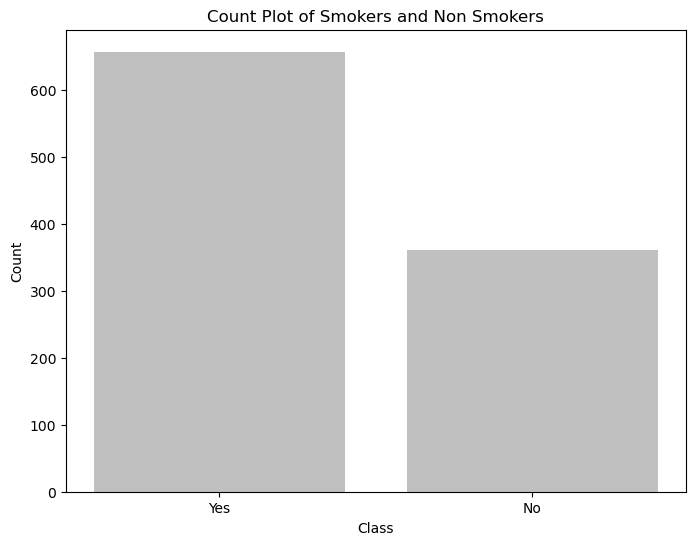

In [19]:
quality_counts = data['smoking'].value_counts()
labels = ['Yes','No']
plt.figure(figsize=(8, 6))
plt.bar(quality_counts.index, quality_counts, color='silver')
plt.title('Count Plot of Smokers and Non Smokers')
plt.xticks(range(2),labels)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

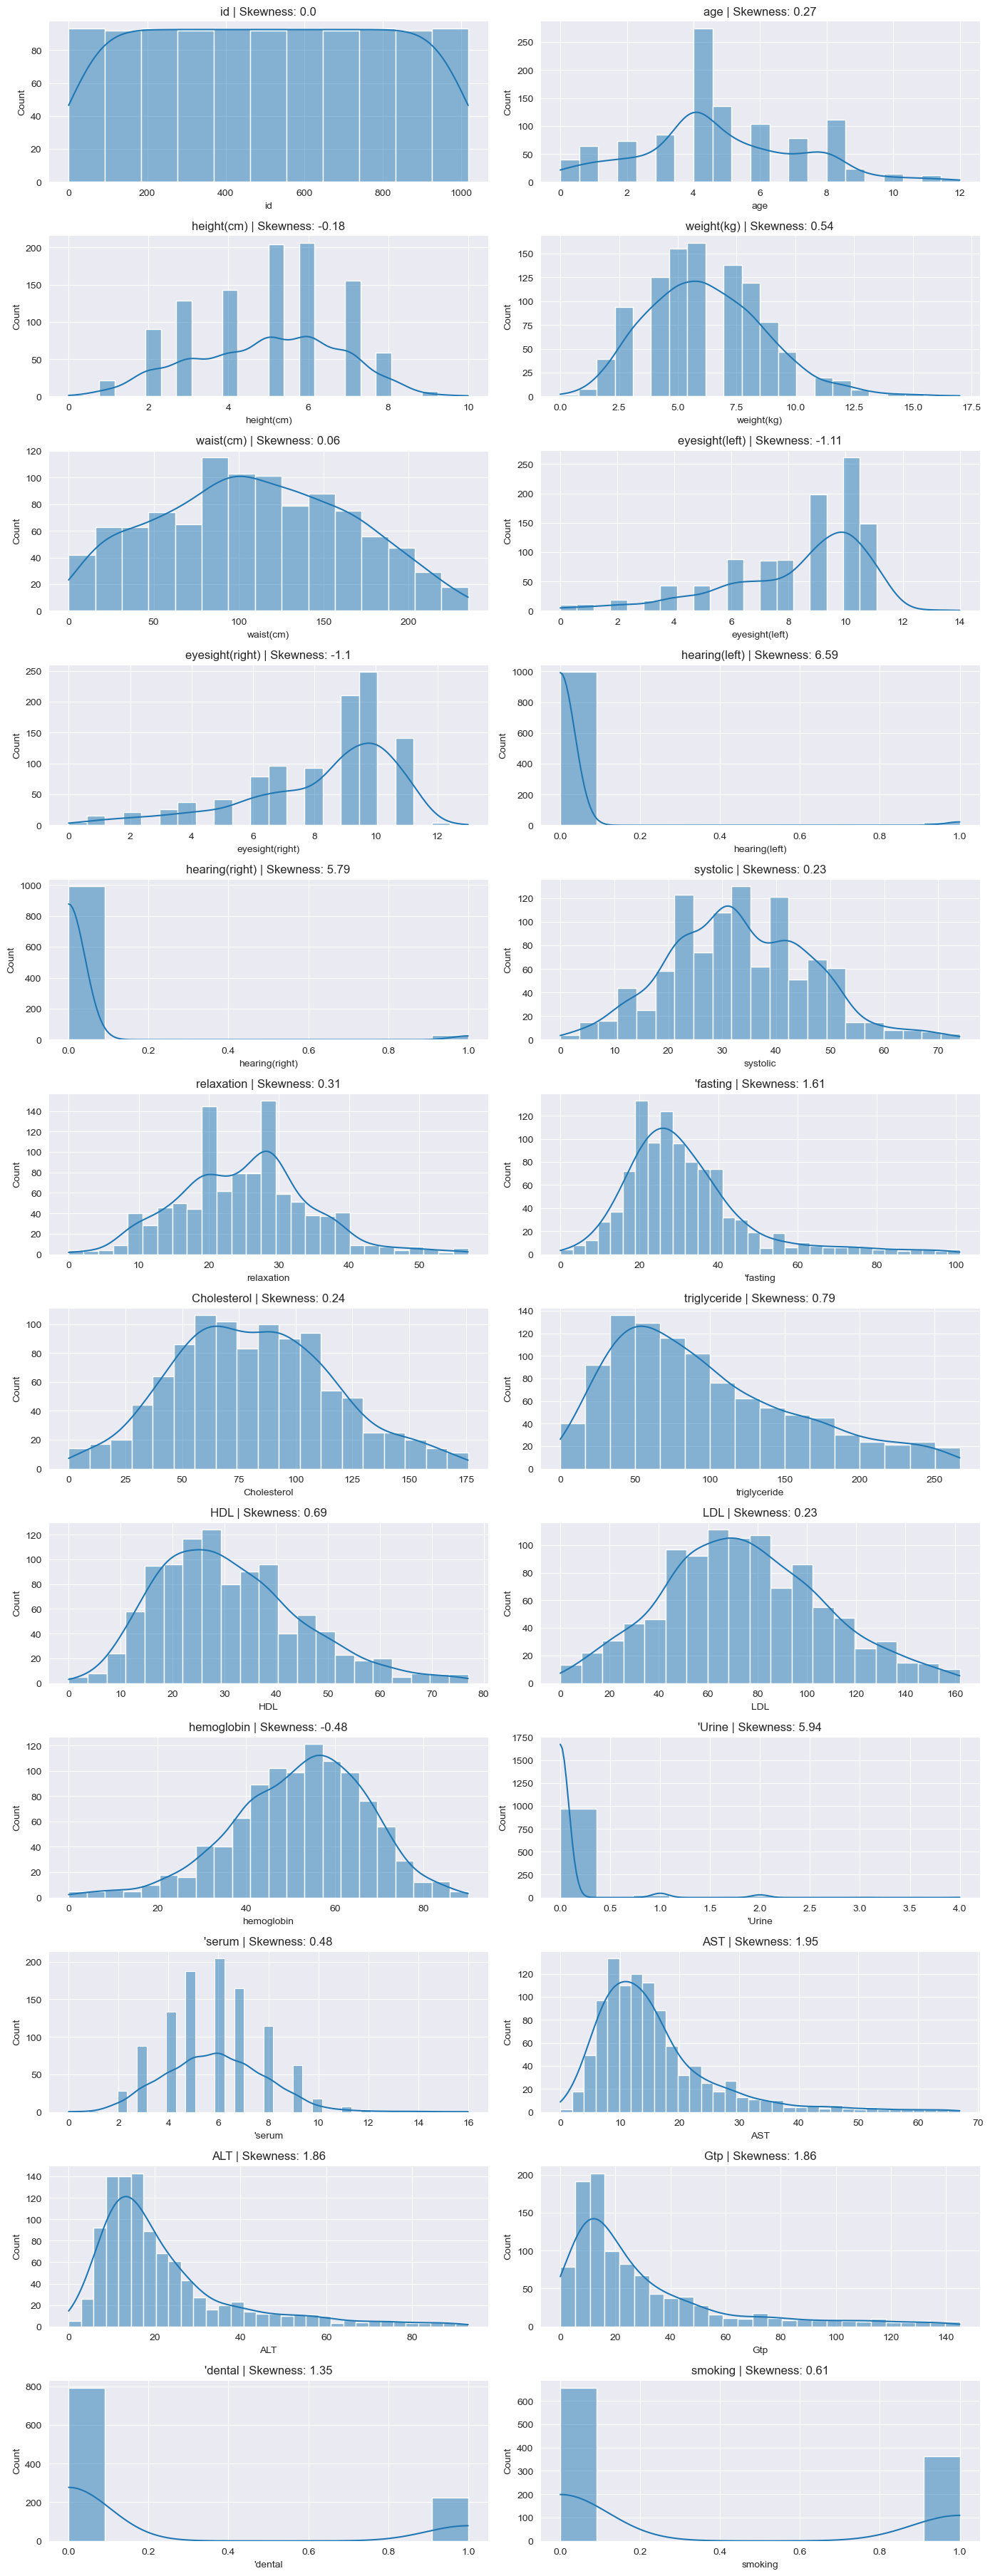

In [20]:
sns.set_style("darkgrid")
numerical_columns = data.select_dtypes(include=["int64", "float64"]).columns
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
	plt.subplot(len(numerical_columns), 2, idx)
	sns.histplot(data[feature], kde=True)
	plt.title(f"{feature} | Skewness: {round(data[feature].skew(), 2)}")
plt.tight_layout()
plt.show()

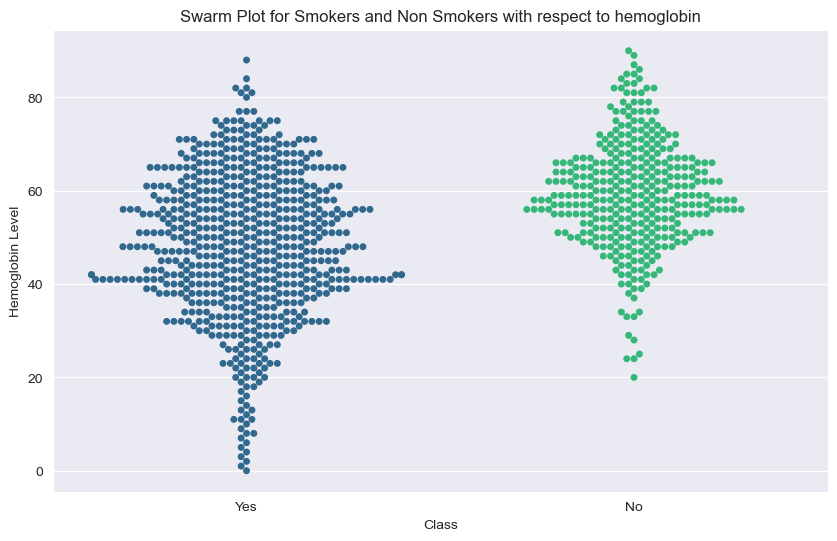

In [21]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x="smoking", y="hemoglobin", data=data, palette='viridis')
plt.title('Swarm Plot for Smokers and Non Smokers with respect to hemoglobin')
plt.xlabel('Class')
plt.ylabel('Hemoglobin Level')
labels = ['Yes','No']
plt.xticks(range(2),labels)
plt.show()

In [22]:
columns = [
    "age",
    "height(cm)",
    "weight(kg)",
    "waist(cm)",
    "systolic",
    "relaxation",
    "Cholesterol",
    "triglyceride",
    "HDL",
    "LDL",
    "hemoglobin",
    "AST",
    "ALT",
    "Gtp"
]

# Undersampling

In [23]:
data['smoking'].value_counts()

smoking
0    657
1    361
Name: count, dtype: int64

In [24]:
data = data.dropna(subset=columns + ['smoking'])

In [25]:
x = data.drop(columns='smoking', axis=1)
y = data['smoking']

<Axes: ylabel='count'>

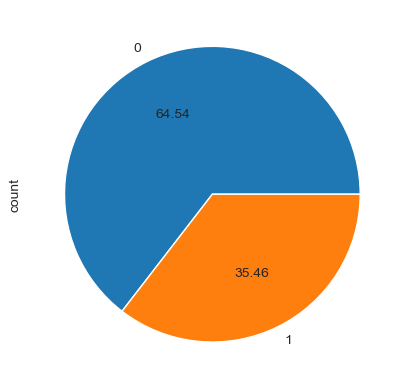

In [26]:
#before undersampling
y.value_counts().plot.pie(autopct = '%.2f')

In [27]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=1)
x, y = rus.fit_resample(x, y)

<Axes: ylabel='count'>

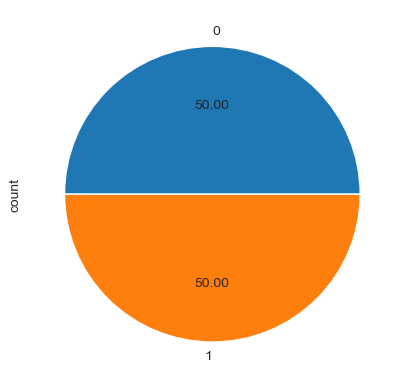

In [28]:
#after undersampling
y.value_counts().plot.pie(autopct = '%.2f')

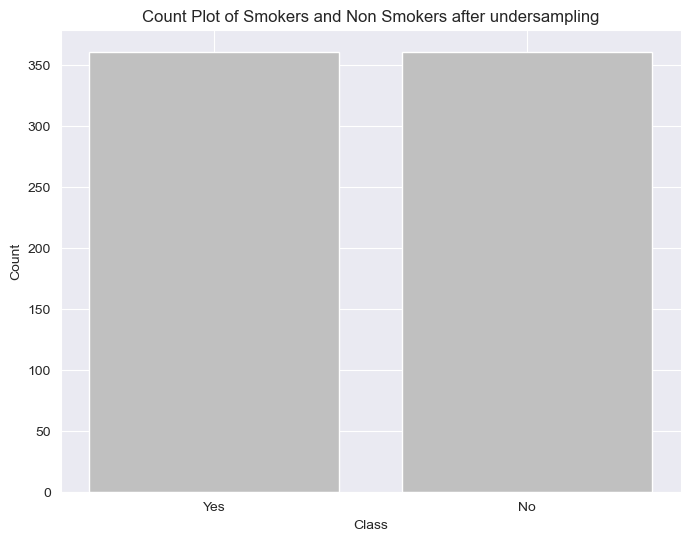

In [29]:
quality_counts = y.value_counts()
labels = ['Yes','No']
plt.figure(figsize=(8, 6))
plt.bar(quality_counts.index, quality_counts, color='silver')
plt.title('Count Plot of Smokers and Non Smokers after undersampling')
plt.xticks(range(2),labels)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Model Building

In [30]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30,train_size = 0.70,random_state = 42)

In [31]:
print(x.shape, xtrain.shape, xtest.shape)

(722, 23) (505, 23) (217, 23)


In [32]:
print(y.shape, ytrain.shape, ytest.shape)

(722,) (505,) (217,)


## Logistic Regression

In [33]:
model = LogisticRegression()

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(xtrain)

In [35]:
model.fit(scaled_data, ytrain)

LogisticRegression()

In [36]:
X_train_prediction = model.predict(scaled_data)
training_data_accuracy = accuracy_score(X_train_prediction, ytrain)

In [37]:
print('Accuracy score on Test Data : ', training_data_accuracy)

Accuracy score on Test Data :  0.7524752475247525


In [38]:
X_test_prediction_dt = model.predict(scaler.transform(xtest))

In [39]:
test_data_accuracy = accuracy_score(X_test_prediction_dt, ytest)

In [40]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.7004608294930875


# Random Forest

In [41]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [42]:
model.fit(xtrain, ytrain)

RandomForestClassifier(random_state=42)

In [43]:
y_pred = model.predict(xtest)

In [44]:
accuracy = accuracy_score(ytest, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

Model Accuracy: 70.51%


In [45]:
feature_importance_df = pd.DataFrame({
    'feature': x.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)
print(feature_importance_df)

            feature  importance
16       hemoglobin    0.107073
2        height(cm)    0.099099
21              Gtp    0.082325
4         waist(cm)    0.057109
13     triglyceride    0.054287
12      Cholesterol    0.050983
18           'serum    0.048794
20              ALT    0.048250
0                id    0.047966
14              HDL    0.046947
15              LDL    0.045400
10       relaxation    0.043147
11         'fasting    0.041474
9          systolic    0.039360
19              AST    0.037126
3        weight(kg)    0.035392
5    eyesight(left)    0.035343
1               age    0.034308
6   eyesight(right)    0.031761
22          'dental    0.006919
17           'Urine    0.003671
8    hearing(right)    0.002530
7     hearing(left)    0.000737


In [ ]:
def predict_credit_card_scam(input_data):
    input_data = input_data[numerical_columns]
    input_data_scaled = sklearn.preprocessing.StandardScaler().fit_transform(input_data)
    predictions = model.predict(input_data_scaled)
    return predictions
def get_file():
    file_path = filedialog.askopenfilename()
    if file_path:
        selected_file_label.config(text="Selected file: " + file_path)
        global ted 
        ted = pd.read_csv(file_path)
        print("File loaded into 'ted' variable.")
        ted2 = ted
        numerical_columns = ['id',
 'age',
 'height(cm)',
 'weight(kg)',
 'waist(cm)',
 'eyesight(left)',
 'eyesight(right)',
 'hearing(left)',
 'hearing(right)',
 'systolic',
 'relaxation',
 "'fasting",
 'Cholesterol',
 'triglyceride',
 'HDL',
 'LDL',
 'hemoglobin',
 "'Urine",
 "'serum",
 'AST',
 'ALT',
 'Gtp',
 "'dental",
 'smoking']
        ted = ted[numerical_columns]
        ted.columns = numerical_columns
        predictions = predict_credit_card_scam(ted)
        for i in predictions:
            if i==1:
                print(f"Smoking {i}")
            else:
                print(f"No Smoking {i}")
root = tk.Tk()
button = tk.Button(root, text="Select your test file", command=get_file)
button.pack(pady=100)
selected_file_label = tk.Label(root, text="Selected file: None")
selected_file_label.pack()
root.geometry("300x300") 
root.mainloop()